# Introduction to Types and Schemas

This notebook reviews the basics and then proceeds to define spaces and points.

### Types

In programming, a *type* defines the kind of data that a variable can hold, specifying how it can be used and what operations can be performed on it. Each type determines the structure of the data and the sorts of operations that make sense for it. For example, numbers and strings behave differently; adding two numbers yields a mathematical result, while adding two strings results in concatenation.

Python has several built-in types that cover a wide range of data. Some fundamental types include:
- `int`: representing whole numbers, such as `5` or `-20`.
- `float`: representing decimal or real numbers, such as `3.14` or `-0.001`.
- `bool`: representing truth values, `True` or `False`.
- `str`: representing text or sequences of characters, like `"Hello"` or `"Python"`.
- `list`: a collection of items stored in a specific order, such as `[1, 2, 3]`.
- `dict`: a collection of key-value pairs, allowing you to map one value to another, like `{"name": "Alice", "age": 25}`.

Understanding types is essential 
because each type allows us to encode different kinds of information. As we work with generalized dynamical systems, types will serve as the building blocks for defining states and interactions within our models.

In [1]:
# Integer (int)
my_int = 5
negative_int = -20
print("Integer examples:", my_int, negative_int)

# Floating-point number (float)
my_float = 3.14
small_float = -0.001
print("Float examples:", my_float, small_float)

# Boolean (bool)
is_true = True
is_false = False
print("Boolean examples:", is_true, is_false)

# String (str)
greeting = "Hello"
language = "Python"
print("String examples:", greeting, language)

# List (list)
my_list = [1, 2, 3]
mixed_list = [1, "two", 3.0, True]
print("List examples:", my_list, mixed_list)

# Dictionary (dict)
my_dict = {"name": "Alice", "age": 25}
complex_dict = {
    "id": 123,
    "details": {
        "name": "Bob",
        "is_student": False,
        "grades": [85, 90, 92]
    }
}
print("Dictionary examples:", my_dict, complex_dict)

Integer examples: 5 -20
Float examples: 3.14 -0.001
Boolean examples: True False
String examples: Hello Python
List examples: [1, 2, 3] [1, 'two', 3.0, True]
Dictionary examples: {'name': 'Alice', 'age': 25} {'id': 123, 'details': {'name': 'Bob', 'is_student': False, 'grades': [85, 90, 92]}}


### Schemas

In the context of generalized dynamical systems, we introduce the concept of a *schema* to represent complex structures in a systematic way. A schema defines a structured "blueprint" for data using Python dictionaries, where each key-value pair represents a specific component of the data.

Each schema uses *keys* to organize the data. The choice of key type influences the schema's behavior and interpretation:

#### 1. **Integer keys**: When using integers as keys, the schema takes on an ordered structure, similar to a vector where each position corresponds to a specific type of data. This approach allows us to define sequences with explicit ordering, a common requirement for numerical or positional data. 

In [2]:
#Example
vector_schema = {
    0: int,     # First position expects an integer
    1: float,   # Second position expects a float
    2: bool     # Third position expects a boolean
}

print(vector_schema)

{0: <class 'int'>, 1: <class 'float'>, 2: <class 'bool'>}


#### 2. **String keys**: With string keys, we assign names to each component, making it easier to interpret the meaning of each value. This is particularly useful for modeling complex states where each element represents a different aspect of the system.

In [3]:

# Example:

named_schema = {
   "name": str,       # Expects a string for name
   "age": int,        # Expects an integer for age
   "is_active": bool  # Expects a boolean for activity status
}

print(named_schema)

{'name': <class 'str'>, 'age': <class 'int'>, 'is_active': <class 'bool'>}


#### 3. **Hash keys**: When using hashes as keys (often represented as unique strings or integers), the schema behaves like a hashtable. This approach is effective for handling large and flexible data sets where the exact elements can vary or where lookup by key is essential.


In [4]:
# Example:
hash_schema = {
    "abc123": int,      # A unique key associated with an integer
    "def456": str,      # A unique key associated with a string
    "ghi789": list      # A unique key associated with a list
}

print(hash_schema)


{'abc123': <class 'int'>, 'def456': <class 'str'>, 'ghi789': <class 'list'>}



By combining these different key types, schemas allow us to construct versatile statespaces that can represent data more flexibly than traditional vector spaces. This enables the modeling of a broader range of systems and applications, where each type and key type plays a unique role in encoding information. In python one technique for building schemas this way quickly and easily is usinge `dataclasses`. For tutorial purposes we will stick to pure python  here.

### Working with More Complex Types in Schemas

To represent more advanced data structures within our schemas, we can extend beyond basic types like `int`, `float`, or `str`. Python’s `typing` module and libraries like `numpy` enable us to handle complex data types, such as lists of specific types, multidimensional arrays, and callable functions. Below are examples of how to integrate these into our schemas, using named keys for improved clarity.

#### 1. Lists with Specified Types

In some cases, we need to represent a list of items where each item is of a particular type, such as a list of floating-point numbers. To specify this type explicitly, we can use `List` from Python’s `typing` module, allowing us to define a list that only holds values of a specified type, like `float`.


In [5]:
from typing import List

# Example schema with a list of floats
list_schema = {
'myList': List[float]  # A list where each element is expected to be a float
}

print(list_schema)

{'myList': typing.List[float]}


In this schema, the `'myList'` key represents a list that should only contain `float` values, providing a clear structure for data that requires a sequence of numerical values.

#### 2. Multidimensional Arrays

For more complex numerical data, we may need to use multidimensional arrays. The `numpy` library provides the `ndarray` type, which can be used to specify arrays of various shapes and dimensions. For instance, we can define a `2x1` array (2 rows, 1 column) to store two related floating-point values.


In [6]:
from numpy import ndarray, array

# Example schema with a 2x1 numpy array
array_schema = {
    # this array has the shape (2, 1) and contains floats
    'my2x1array': ndarray[tuple[int, int], float]  # A numpy array with dimensions 2x1
}

print(array_schema)

{'my2x1array': numpy.ndarray[tuple[int, int], float]}



In this schema, the `'my2x1array'` key expects a `numpy` array with dimensions `(2,1)`. This is especially useful for data structures that require compact storage of related numerical values, like vectors or small matrices.

#### 3. Callables (Functions)

Sometimes, the schema might need to include functions, especially when defining dynamic behavior or specifying transformations. We can use the `Callable` type from the `typing` module to specify that a particular key is expected to hold a function or callable object.


In [7]:

from typing import Callable

# Example schema with a callable function
function_schema = {
    # using type annocations to specify the expected type of the input and output
    'myFunc': Callable[[List[float], ndarray[tuple[int, int], float]], bool]  # A key expected to hold a function that takes a List[float] and a 2x1 ndarray, and returns a bool
}

print(function_schema)

{'myFunc': typing.Callable[[typing.List[float], numpy.ndarray[tuple[int, int], float]], bool]}



In this schema, `'myFunc'` represents a function, which could be used to define a specific behavior or transformation in our generalized dynamical system. Callables are essential for encoding custom actions or processes within the statespace.

These advanced types enhance the flexibility and power of our schemas, allowing us to represent complex data structures like type-specific lists, multidimensional arrays, and callable functions. With these capabilities, our generalized statespaces can handle a wide range of complex data and operations, making them suitable for sophisticated dynamical systems modeling.

#### Complex Schemas

Now that we've explored various types of data that can be included in our schemas, let's combine these elements to create more complex and comprehensive schemas. Complex schemas allow us to represent intricate data structures that can capture the full complexity of sophisticated dynamical systems.

Here's an example of a complex schema that incorporates the different types we've discussed: 


In [8]:
complex_schema = {
    'myList': List[float],  # A list where each element is expected to be a float,
    'my2x1array': ndarray[tuple[int, int], float],  # A numpy array with dimensions 2x1
    'myFunc': Callable[[List[float], ndarray[tuple[int, int], float]], bool]
}

print(complex_schema)

{'myList': typing.List[float], 'my2x1array': numpy.ndarray[tuple[int, int], float], 'myFunc': typing.Callable[[typing.List[float], numpy.ndarray[tuple[int, int], float]], bool]}


It's important to note that Python is not a strongly typed language, and dictionary-based schemas do not directly support type enforcement. While tools like `dataclasses` can provide better type checking in Python, we'll use our flexible schema approach to showcase its power and versatility.

Now that we have defined our complex schema a we can create a function to check records against it. 

In [9]:
# Define the function that matches the 'myFunc' type in the schema
def myFunc(myList: List[float], myArray: ndarray) -> bool:
    
    # Check if myList is a list
    if not isinstance(myList, list):
        print("myList is not a lis")
        return False
    
    # Check if the elements of myList are floats
    for element in myList:
        if not isinstance(element, float):
            print("myList does not contain only floats")
            return False
    
    # check if myArray is a numpy array
    if not isinstance(myArray, ndarray):
        print("myArray is not a numpy array")
        return False
    
    # Check if myArray has the shape (2, 1)
    if myArray.shape != (2, 1):
        # edgge case where the shape is (2,) since its shorthand for (2, 1) in 1D arrays
        if myArray.shape == (2,):
            pass
        else:
            print("myArray does not have the shape (2, 1)")
            return False
    
    # check if the elements of myArray are Integers
    if not myArray.dtype == int:
        print("myArray does not contain only integers")
        return False

    # If both conditions are met, return True
    return True

Let's create some sample records to demonstrate how this schema can be used. 

We'll create several sample records: some that adhere to the schema and others that don't. Then, we'll use our `myFunc` to validate these records against our schema. This approach allows us to maintain flexibility while still ensuring data integrity.

Let's start by creating these sample records and then use our `myFunc` to check if they conform to our schema:

In [10]:

# Example record that matches the schema requirements
record_1 = {
    'myList': [2.0, 4.1],                           # Example list of floats
    'my2x1array': array([1.1, 3]),             # Example 2x1 numpy array
    'myFunc' : myFunc                              # Example function
}

print("This is the record satisfying the schema:")
print(record_1)
print("")

# Demonstrate the function in action
result_1 = record_1['myFunc'](record_1['myList'], record_1['my2x1array'])
print("This uses the function to check that the other elements in the record satisfy the schema:")
print("Function result:", result_1)  # Expected output: False


This is the record satisfying the schema:
{'myList': [2.0, 4.1], 'my2x1array': array([1.1, 3. ]), 'myFunc': <function myFunc at 0x11c5367a0>}

myArray does not contain only integers
This uses the function to check that the other elements in the record satisfy the schema:
Function result: False


We used myFunc to introduce a method which could validate the schema. Putting type annotated callables in schemas can be very helpful for a range use cases, such as using functions to encode utilies, beliefs or strategies.  In this example, we used constraint satisfaction because this tutorial is about types and schemas.


In the previous example, we saw a record (`record_1`) that did not satisfy the schema requirements. The `myFunc` returned `False` because the `my2x1array` contained a float value (1.1) instead of an integer.

Now, let's look at another example where the record does satisfy the schema requirements. We'll create a new record (`record_2`) that adheres to the schema and test it with our validation function.

In [11]:
# Example record that matches the schema requirements
record_2 = {
    'myList': [2.1, 4.2],                           # Example list of floats
    'my2x1array': array([1, 3]),             # Example 2x1 numpy array
    'myFunc' : myFunc                              # Example function
}

# Demonstrate the function in action
result_2 = record_2['myFunc'](record_2['myList'], record_2['my2x1array'])
print("This uses the function to check that the other elements in the record satisfy the schema:")
print("Function result:", result_2)  # Expected output: True

This uses the function to check that the other elements in the record satisfy the schema:
Function result: True


`record_2` can be considered a **Point** in the **Space** characterized by `complex_schema`. With a little reorganization we could make `myFunc` a constraint that is expected to hold for all points rather than one of the values in a record.

In [12]:
mySpace = {'schema':
           {'myList': List[float],  # A list where each element is expected to be a float,
            'my2x1array': ndarray[tuple[int, int], float]
            },
    'constraints':{'domain':myFunc}
}

print(mySpace)

{'schema': {'myList': typing.List[float], 'my2x1array': numpy.ndarray[tuple[int, int], float]}, 'constraints': {'domain': <function myFunc at 0x11c5367a0>}}


In [13]:
myPoint = {'myList': [2.1, 4.2], 'my2x1array': array([1, 3])}
print(myPoint)

{'myList': [2.1, 4.2], 'my2x1array': array([1, 3])}


In [14]:
print(mySpace['constraints']['domain'](myPoint['myList'], myPoint['my2x1array']))  # Expected output: True

True


We can even make a distance function between two points. Let us interpret the `'2x1array'` as a direction and the `'myList'` as a collection of values of representing scalar distances along that radius. Then we can define and compute the **total** distance between all the associated  in 2d space. We're defining the the total distance as:

$D(x,y) = \sqrt{\sum_{i,j} (x_i - y_j)^2}$.

were $x$ and $y$ are constucted as $\{m\cdot v | \forall m\in M \}$ where $M =$`myList` and $v =$`my2x1array`.


In [15]:
import matplotlib.pyplot as plt
import numpy as np

randPoints = {'myList': np.random.rand(25), 'my2x1array': array([np.random.randint(low=-5,high=5), np.random.randint(low=-5,high=5)])}

def make_points(point):
    dir  = point['my2x1array']
    values = [mag*dir for mag in point['myList']]
    return values

points = make_points(randPoints)

print("randPoints:")
print(randPoints)
print("")
print("points:")
print(points)

randPoints:
{'myList': array([0.10729545, 0.97045922, 0.51731192, 0.51669807, 0.1160161 ,
       0.78679774, 0.97546586, 0.40598621, 0.90202587, 0.36414058,
       0.42603765, 0.86094396, 0.66067566, 0.00120986, 0.64545178,
       0.52213263, 0.27986121, 0.10331595, 0.08138322, 0.53870682,
       0.07919515, 0.28270592, 0.22135193, 0.05153071, 0.4302503 ]), 'my2x1array': array([-2, -3])}

points:
[array([-0.2145909 , -0.32188634]), array([-1.94091843, -2.91137765]), array([-1.03462383, -1.55193575]), array([-1.03339614, -1.55009422]), array([-0.23203219, -0.34804829]), array([-1.57359549, -2.36039323]), array([-1.95093172, -2.92639758]), array([-0.81197243, -1.21795864]), array([-1.80405175, -2.70607762]), array([-0.72828117, -1.09242175]), array([-0.85207531, -1.27811296]), array([-1.72188792, -2.58283188]), array([-1.32135132, -1.98202698]), array([-0.00241972, -0.00362959]), array([-1.29090357, -1.93635535]), array([-1.04426526, -1.56639789]), array([-0.55972243, -0.83958364]), arra

Text(0.5, 1.0, 'Randomly Generated Points along the 2x1array')

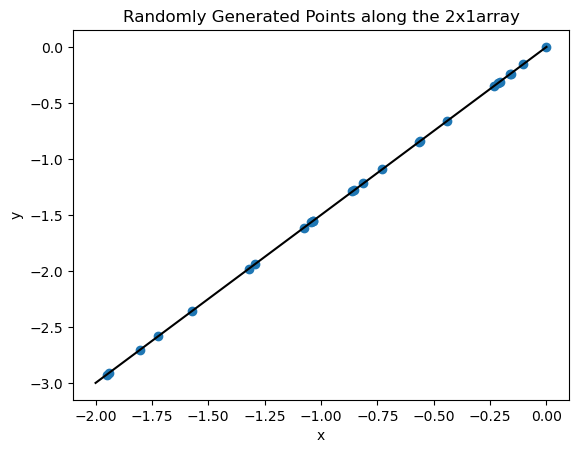

In [16]:
plt.scatter(*zip(*points))
#plot the line from the 2x1array
plt.plot([0, randPoints['my2x1array'][0]], [0, randPoints['my2x1array'][1]], 'k-')

# label the x and y axes
plt.xlabel('x')
plt.ylabel('y')
plt.title('Randomly Generated Points along the 2x1array')

Now to compute a distance




In [17]:
def distance(point1, point2):
    dir_1  = point1['my2x1array']
    dir_2 = point2['my2x1array']

    values_1 = [mag*dir_1 for mag in point1['myList']]
    values_2 = [mag*dir_2 for mag in point2['myList']]

    dist = 0
    for val1, val2 in zip(values_1, values_2):
        dist += (val1 - val2)**2
    
    return dist**0.5

In [18]:
np.random.randint(low=-5,high=5)

1